In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [9]:
# Setting up training
bs = 16
size = 224
np.random.seed(2)
path = Path('data')

In [23]:
tfms = get_transforms(do_flip = False,
                      max_rotate = None,
                      max_zoom = 1,
                      max_lighting = None,
                      max_warp = None
                     )
data = ImageDataBunch.from_folder(path,
                                  train=".",
                                  valid_pct=0.2,
                                  size = size,
                                  ds_tfms = tfms,
                                  num_workers = 4
                                 )

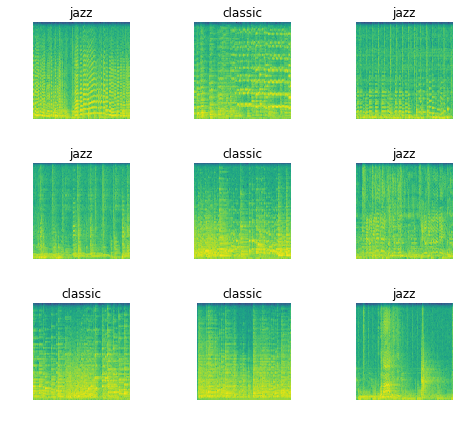

In [24]:
data.show_batch(rows=3, figsize=(7,6))

In [25]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.save('before_train')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


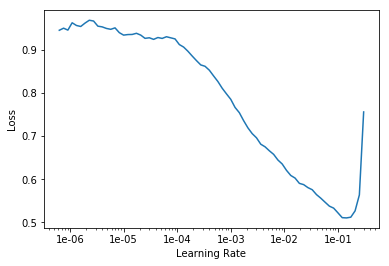

In [15]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.load('before_train')
learn.fit_one_cycle(4, max_lr=1e-1)
learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate
1,0.371203,6.193370,0.518367
2,0.471417,0.427688,0.080272
3,0.286641,0.111385,0.038095
4,0.169198,0.107120,0.036735


In [29]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(3e-4,3e-2))
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate
1,0.139347,0.274351,0.063946
2,0.137297,17.984509,0.152381
3,0.146046,0.189155,0.048980
4,0.125553,0.195805,0.059864
5,0.079117,0.137364,0.025850
6,0.068302,0.072526,0.020408
7,0.048725,0.055810,0.023129
8,0.037978,0.056204,0.021769


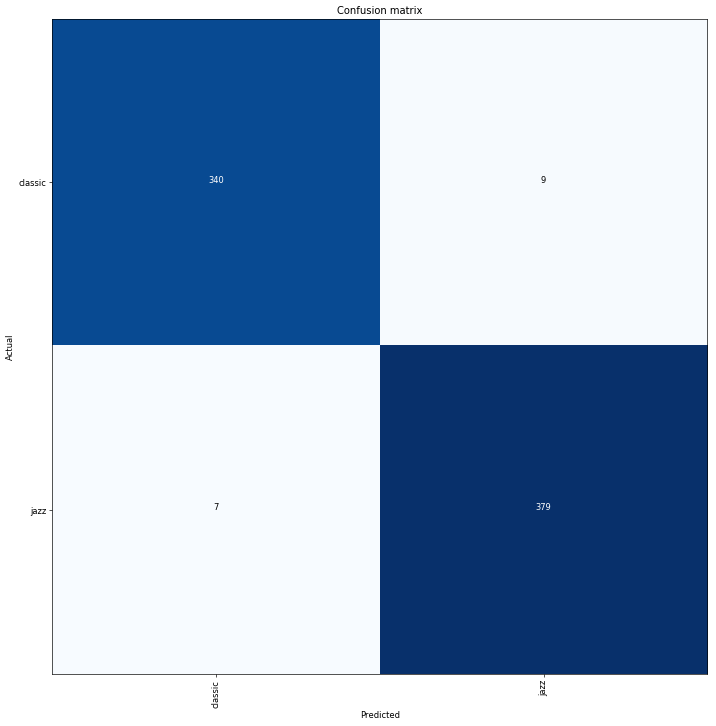

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

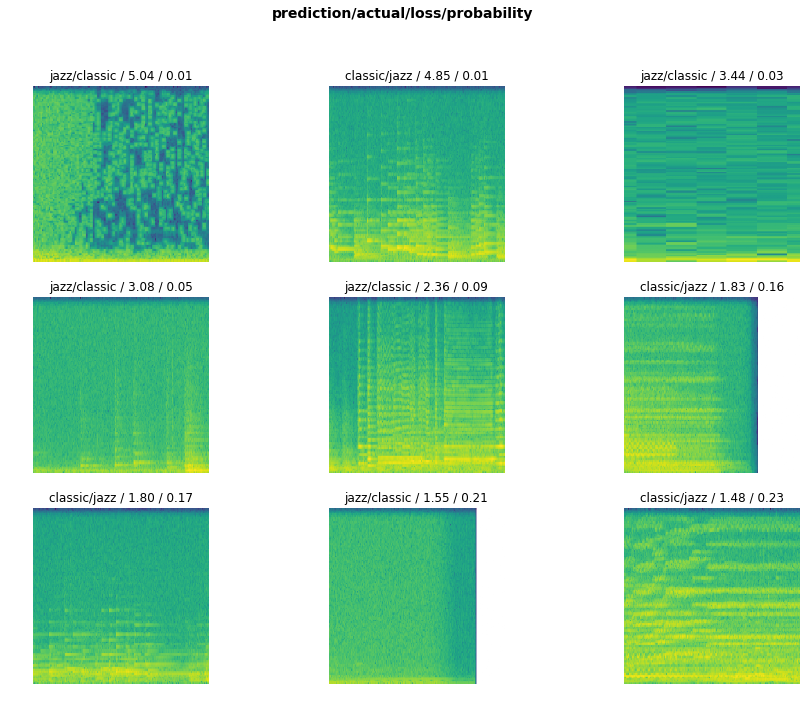

In [31]:
interp.plot_top_losses(9, figsize=(15,11))